In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from scipy.optimize import root_scalar
from util import load_sample,load_acertos, provas, params_inep, irt_params_to_enem_scale,item_info_inep, PL3, find_theta, scalecalparams

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual


%load_ext autoreload
%autoreload 2

# Comparação entre a dificuldade dos itens e as notas dos candidatos
Uma "mapa de Wright" é uma visualização que compara a dificuldade dos itens com as habilidades dos candidatos. Uma vantagem do TRI é que coloca estas duas quantidades na mesma escala. Assim, é possível fazer visualizações como este https://github.com/atp/enem/issues/3#issuecomment-2383941598 

Note que no PISA, TIMMs etc. as dificuldades são distribuídas em torno da média da distribuição de habilidades dos examinandos. Não é assim no ENEM. 

Uma forma de quantificar a dificuldade de um item é o parâmetro `b` do modelo para a probabilidade de acerto $P(\theta)$. Para o modelo 1PL e 2PL isso é o $\theta$ onde a probabilidade de acerto = 0.5. Mas para o modelo 3PL talvez é mais interessante usar outro valor, onde a probabilidade de acerto é 65%, por exemplo ("Response Probability = 65% ou RP65). É isso que o PISA faz (usam 62%, mas 65% é mais visto na literatura, acho).  

$ e $

$$ a+b $$

In [3]:
# Find where the 3PL logistic funcions = 0.65 (find the root of PL3 - 0.65)
# Well, this was fun. The secret was the "bracket" argument to the root finder function...
# ... it may fail for large b (INEP has a few of those). Let's find out.

def find_theta(a,b,c,prob=0.65):
    #print(a,b,c)
    def fun(x,a,b,c):
        return PL3(x,a,b,c) - prob
    
    res = root_scalar(fun,x0=b,x1=None,bracket=[-100,100],args=(a,b,c))
    if res.converged:
        return res.root
    else:
        return np.NaN

find_theta(1,1,0.2,0.65)

1.2513144282809088

In [173]:
items = params_inep(2023,area='MT').sort_values('c_inep')
items

,a_inep,b_inep,c_inep,u
CO_ITEM,,,,
125902,2.40824,2.57722,0.04513,1
81946,1.52639,1.16539,0.05545,1
126028,2.33037,1.91643,0.08390,1
16795,1.05676,1.98507,0.08392,1
37441,3.01304,2.67185,0.08455,1
98278,1.71891,2.19574,0.08744,1
125884,3.44278,1.55674,0.09149,1
14410,2.38237,1.88674,0.10321,1
111446,2.09757,1.52611,0.10674,1


In [28]:
items.loc[['14389','86783','141570','27330'],:]

,a_inep,b_inep,c_inep,u
CO_ITEM,,,,
14389,0.96035,1.52433,0.14823,1
86783,3.58609,3.00088,0.19242,1
141570,1.79257,0.86167,0.17314,1
27330,1.94836,1.93920,0.17138,1


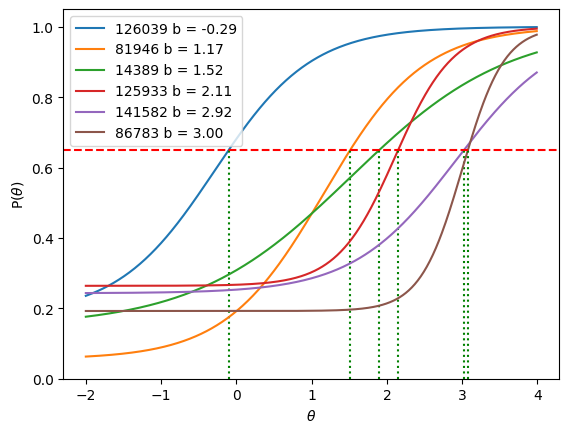

In [177]:
x = np.arange(-2,4,0.01)
#items = params_inep(2023,area='MT').sample(5)
itemstoplot = items.loc[['81946','14389','86783','126039','141582','125933'],:]
itemstoplot = itemstoplot.sort_values('b_inep')
for item,params in itemstoplot.iterrows():
    a,b,c = params['a_inep'],params['b_inep'],params['c_inep']
    ax=sns.lineplot(x=x,y=PL3(x,a,b,c),label=item + f' b = {b:.2f}')
    rp65 = find_theta(a,b,c,0.65)
    ax.vlines(rp65,0,0.65,color='g',ls='dotted')
ax.axhline(0.65,c='r',ls='--')
ax.set_ylim(0,1.05)
ax.set_ylabel(r'P($\theta$)')
ax.set_xlabel(r'$\theta$')
plt.legend()

In [186]:
scalecalparams('CH')

(np.float64(112.31273951152298), np.float64(501.4852958227793))

In [179]:
129.7*3+500

889.0999999999999

In [215]:
ano = 2023
area = 'MT'
items = params_inep(ano,area=area)
items

,a_inep,b_inep,c_inep,u
CO_ITEM,,,,
125929,1.58702,2.19080,0.24232,1
141582,1.46956,2.91942,0.24283,1
31650,3.33563,1.08025,0.20912,1
85504,2.21375,1.82985,0.15414,1
28932,2.39434,1.98395,0.11508,1
126028,2.33037,1.91643,0.08390,1
111754,2.95569,2.84307,0.24511,1
125969,1.78452,0.74313,0.18879,1
117706,2.26306,1.45121,0.23837,1


In [217]:
s = items.apply(lambda x: find_theta(x['a_inep'],x['b_inep'],x['c_inep'],0.65),axis=1)

In [219]:
pd.DataFrame(s,columns=['RP65'])

,RP65
CO_ITEM,
125929,2.286923
141582,3.022374
31650,1.149454
85504,1.987212
28932,2.161111
126028,2.122765
111754,2.892359
125969,0.897749
117706,1.522879


In [ ]:
items['rp65'] = items.apply(lambda x: find_theta(x['a_inep'],x['b_inep'],x['c_inep'],0.65),axis=1)


<Axes: xlabel='b_inep', ylabel='rp65'>

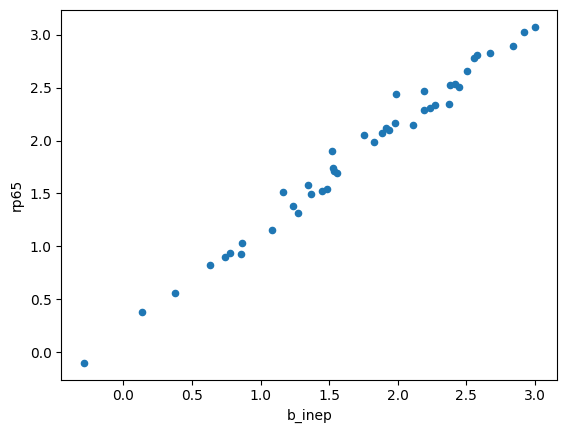

In [52]:
items.plot(kind='scatter',x='b_inep',y='rp65')

# Mapa dos itens
Agora queremos juntar dificuldades das questões com as distribuições de habilidade (notas) na população. Uma inspiração é o chamado "Wright Map" ou mapa itens-pessoa como aqui https://github.com/atp/enem/issues/3 

<Axes: xlabel='NU_NOTA_MT', ylabel='Density'>

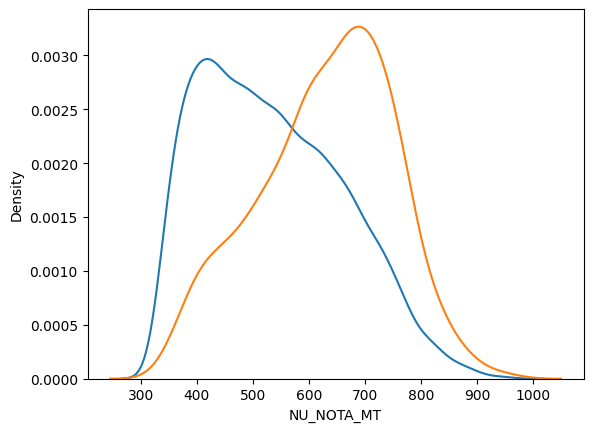

In [53]:
# carregar uns 1000 ou 10 mil candidatos, para visualizar sua distribuição
ano = 2023
area = 'MT'
N = 10000
amostra = load_sample(ano,N)
amostra2 = amostra[amostra['TP_ESCOLA'] == 3]
nota = amostra[f'NU_NOTA_{area}']
nota2 = amostra2[f'NU_NOTA_{area}']
sns.kdeplot(nota)
sns.kdeplot(nota2)

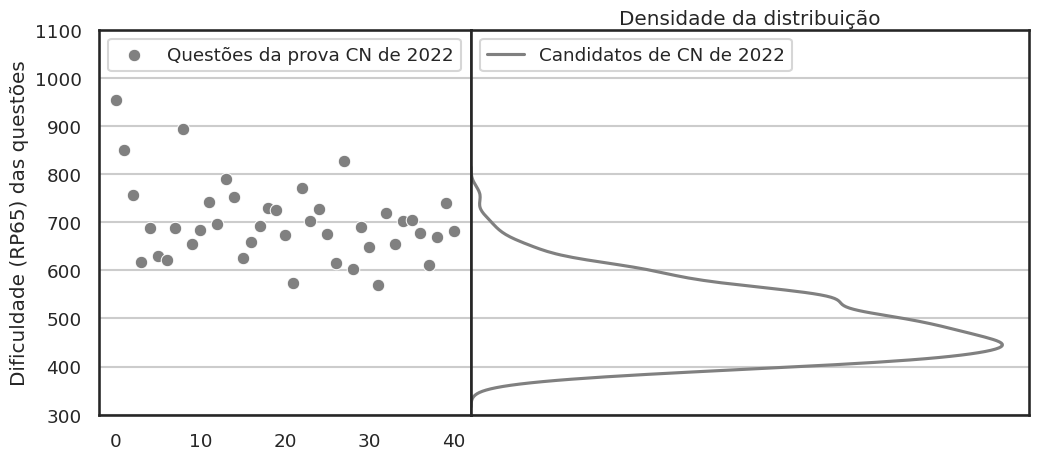

In [373]:
ano, area = 2022, 'CN'
amostra = load_sample(ano,N)
pop = amostra[f'NU_NOTA_{area}']

items = params_inep(ano,area=area).sort_values(by='a_inep')
items['rp65'] = items.apply(lambda x: find_theta(x['a_inep'],x['b_inep'],x['c_inep'],0.65),axis=1)
slope,intercept = scalecalparams(area)
items['rp65'] = items['rp65'].apply(lambda x: x*slope + intercept)
rp65 = items['rp65']

def wmfig(rp65,pop,ano,area):
    with sns.plotting_context("talk",font_scale=0.8):
        fig,axs = plt.subplots(1,2,figsize=(12,5),sharey=True,width_ratios=[2,3])
        ax1,ax2 = axs[0],axs[1]
        sns.scatterplot(x=range(0,len(rp65)),y=rp65,ax=ax1,label=f"Questões da prova {area} de {ano}",color='gray')
        ax1.set_ylabel("Dificuldade (RP65) das questões")
        ax1.set_ylim(300,1100)
        ax1.grid(axis='y')
        ax1.legend(loc='upper left')
    
    
        sns.kdeplot(y=pop,ax = ax2, label=f"Candidatos de {area} de {ano}",color='gray')
        ax2.xaxis.set_label_position('top') 
        ax2.set_xlabel('Densidade da distribuição')
        ax2.set_xticks([])
        #ax2.label_outer()
        plt.subplots_adjust(wspace=0)
        ax2.grid(axis='y')
        ax2.legend(loc='upper left')
    return



wmfig(rp65,pop,ano,area)

In [182]:
def wm(ano = 2023,area = 'MT',N = 10000):
        
    amostra = load_sample(ano,N)
    pop = amostra[f'NU_NOTA_{area}']

    items = params_inep(ano,area=area).sort_values(by='a_inep')
    items['rp65'] = items.apply(lambda x: find_theta(x['a_inep'],x['b_inep'],x['c_inep'],0.65),axis=1)
    slope,intercept = scalecalparams(area)
    items['rp65'] = items['rp65'].apply(lambda x: x*slope + intercept)
    rp65 = items['rp65']
    wmfig(rp65,pop,ano,area)
    
    return

areawidg = widgets.Dropdown(
    options=['CN','CH','MT','LC'],
    value='MT',
    description='Area:',
)
anowidg = widgets.Dropdown(
    options=range(2009,2024),
    value=2023,
    description='Ano:',
)
#wm(2011,'MT',N=1000)
interact(wm,ano=anowidg,area=areawidg,N=fixed(10000))

interactive(children=(Dropdown(description='Ano:', index=14, options=(2009, 2010, 2011, 2012, 2013, 2014, 2015…

<function __main__.wm(ano=2023, area='MT', N=10000)>

Agora o que podemos fazer é
1.  Deixar a visualização acima mais bonita
2.  Generalizar para outros anos e areas.

Estou pensando em uma visualização interativa (usando ipywidgets) ou uma visualização de múltiplas pequenas (um gráfico pequeno para cada ano, por exemplo). 

In [29]:
pd.set_option('display.max_columns', 500)

In [44]:
amostra = load_sample(2022,10000)
amostra = amostra[amostra['TP_ST_CONCLUSAO'] == 2]

In [45]:
amostra['TP_ESCOLA'].value_counts()

TP_ESCOLA
2    4031
3     973
Name: count, dtype: int64

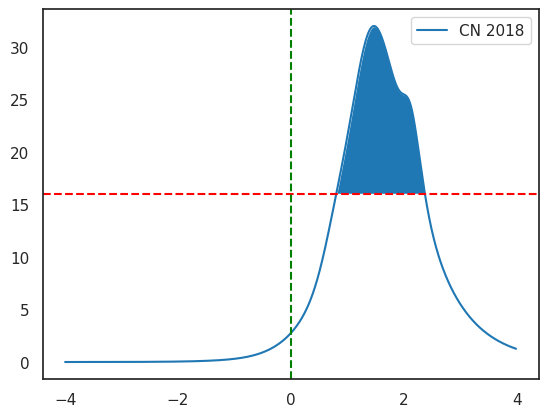

In [466]:
def iteminfo(theta,a,b,c):
    P = PL3(theta,a,b,c)
    Q = 1 - PL3(theta,a,b,c)
    I = a**2*Q*(P - c)**2/(P*(1-c))
    return I

def testinfo(theta,items):
    I = np.zeros(len(theta))
    for item,params in items.iterrows():
        a,b,c = params['a_inep'],params['b_inep'],params['c_inep']
        I = I + iteminfo(theta,a,b,c)
    return I

theta = np.arange(-4,4,0.01)
#sns.lineplot(x=theta,y=iteminfo(theta,a,b,c))
ano = 2022
area = 'CN'
    
def testinfofig(ano,area,color=None):
    try:
        ano = ano[0]
        area = area[0]
    except:
        pass
    theta = np.arange(-4,4,0.01)
    items = params_inep(ano,area)

    with sns.plotting_context("notebook"):
        I = testinfo(theta,items)
        ax = sns.lineplot(x=theta,y=I,label=f'{area} {ano}')
        ax.axhline(y=16,ls='--',color='r')
        ax.axvline(x=0,ls='--',color='g')
        plt.fill_between(theta,16,I,where=I>16)
        #ax.set_xlabel(r"Proficiência $\theta$ (escala TRI N(0,1))")
        #ax.set_ylabel("Informação")
        #ax.set_title(f"Curva de informação da prova {area} de {ano}")
    return ax
testinfofig(2018,'CN');


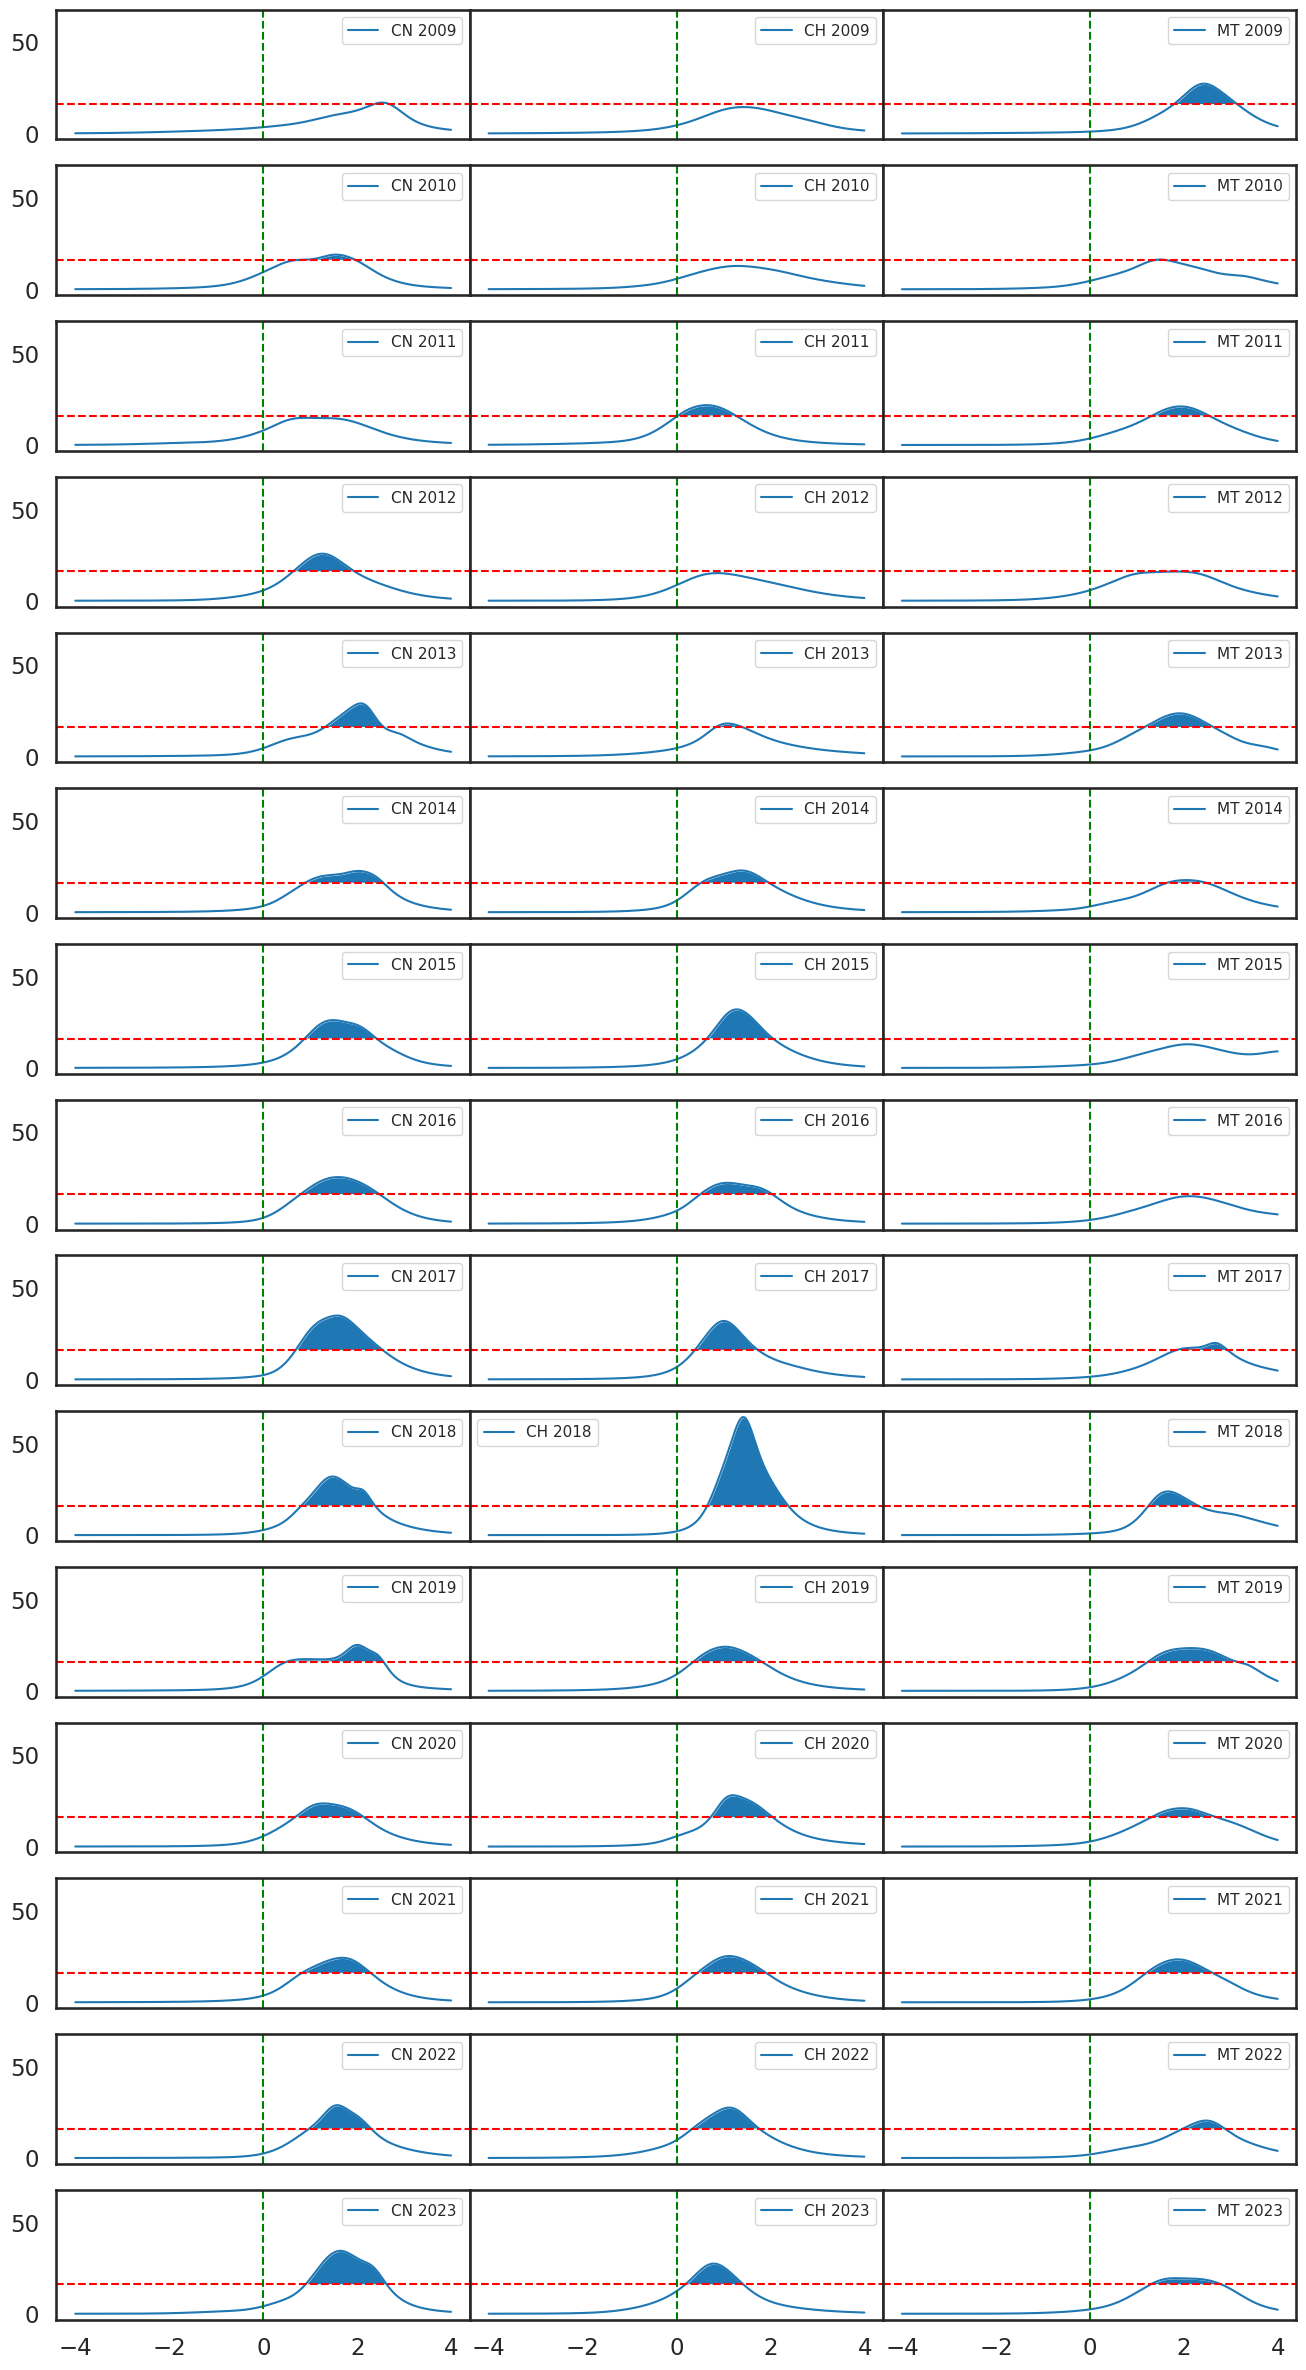

In [469]:
anos = range(2009,2024)
areas = ['CN','CH','MT']
fig, axs = plt.subplots(len(anos),len(areas),figsize=(16,30),sharex=True, sharey=True)
for i,ano in enumerate(anos):
    for j,area in enumerate(areas):
        plt.sca(axs[i,j])
        testinfofig(ano,area)
plt.subplots_adjust(wspace=0)

Text(0.5, 0, 'Nota (escala ENEM)')

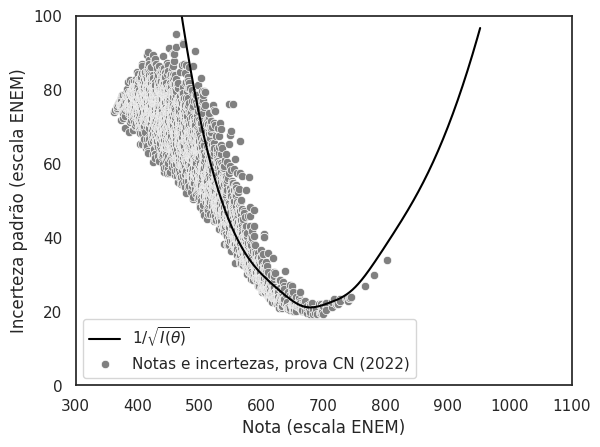

In [357]:
theta = np.arange(-4,4,0.01)
#sns.lineplot(x=theta,y=iteminfo(theta,a,b,c))
ano = 2022
area = 'CN'
alpha,beta = scalecalparams(area)
items = params_inep(ano,area=area)
ax = sns.lineplot(x=theta*alpha+beta,y=alpha/np.sqrt(testinfo(theta,items)),color = 'k',label=r"$1/\sqrt{I(\theta)}$")
ax.set_ylim(0,100)
ax.set_xlim(300,1100)

prova = provas(ano,area,pickone=True)
padrs,notas = load_padr(prova,3000,nota_inep=True)
scores = score_inep(padrs,ano,area,enemscale=True,method="EAP").join(notas).sort_values('nota')

ax = sns.scatterplot(data=scores,x='nota',y='se',color="gray",label=f"Notas e incertezas, prova {area} ({ano})")
ax.set_ylabel("Incerteza padrão (escala ENEM)")
ax.set_xlabel("Nota (escala ENEM)")


In [227]:
scores

,nota,se,acertos,caderno,nota_inep
candidato,,,,,
210058523040,325.735427,68.858449,4,1221,325.8
210061486111,325.796641,68.560700,4,1221,325.9
210059892272,326.299784,68.917661,7,1221,326.4
210060612353,326.806486,69.169770,8,1221,326.9
210061502976,327.529993,69.680906,5,1221,327.6
...,...,...,...,...,...
210060672261,765.883802,21.632995,38,1221,765.9
210058297333,767.009343,22.155611,38,1221,767.0
210060203453,772.019714,21.640252,40,1221,772.0


In [209]:
padrs

,13725,14366,14389,14410,14994,16795,24523,27119,27330,28932,...,125969,125977,126028,126039,141513,141540,141566,141567,141570,141582
candidato,,,,,,,,,,,,,,,,,,,,,
210059420768,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,1,1,0
210058934331,0,1,1,0,1,1,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
210058521934,0,1,0,0,0,0,0,0,0,0,...,1,1,0,1,1,1,0,1,1,1
210060982509,1,1,0,0,1,1,1,1,0,0,...,1,1,1,1,1,0,1,0,1,1
210060829677,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210061271303,0,0,1,0,1,1,0,0,0,0,...,1,0,0,1,1,0,1,0,0,0
210059795657,0,1,1,0,0,0,0,1,0,0,...,1,1,1,1,1,0,0,1,1,0
210058580827,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1


In [359]:
from util import load_padr, score_inep, provas

np.int64(1087)

Text(0, 0.5, 'Nota reproduzida $\\pm$ erro padrão')

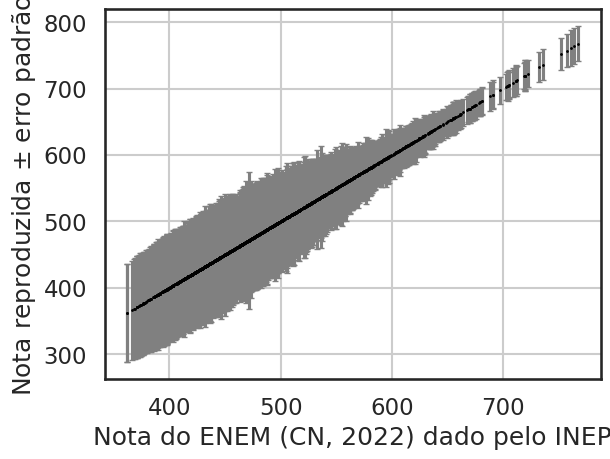

In [472]:
ano,area = 2022,'CN'
N = 2000
prova = provas(ano,area,pickone=True)
padrs,notas = load_padr(prova,N,nota_inep=True)
scores = score_inep(padrs,2022,'CN',enemscale=True).join(notas).sort_values('nota')
plt.errorbar(y=scores['nota'],x=scores['nota_inep'],yerr=scores['se']*1,fmt='ok',ms=1,ecolor='gray',errorevery=1,capsize=2)
ax = plt.gca()
#ax.set_yticklabels([]);
plt.grid(axis='both')
ax.set_xlabel(f'Nota do ENEM ({area}, {ano}) dado pelo INEP')
ax.set_ylabel('Nota reproduzida $\pm$ erro padrão')

In [473]:
scores

,nota,se,acertos,caderno,nota_inep
candidato,,,,,
210056199630,361.958938,73.966896,2,1085,362.0
210057749197,362.257003,74.106781,2,1085,362.3
210056190683,366.179258,74.797464,2,1085,366.2
210056422664,368.456105,75.533571,6,1085,368.5
210055908447,368.872829,76.393654,4,1085,368.9
...,...,...,...,...,...
210055385901,752.161356,24.474061,32,1085,752.1
210056716850,757.128913,25.098108,37,1085,757.1
210056917534,761.204975,26.930371,38,1085,761.2


In [474]:
prova,ano,area

(np.int64(1085), 2022, 'CN')

Text(0.5, 0.98, 'Prova CN (2022): escolhas ao acaso')

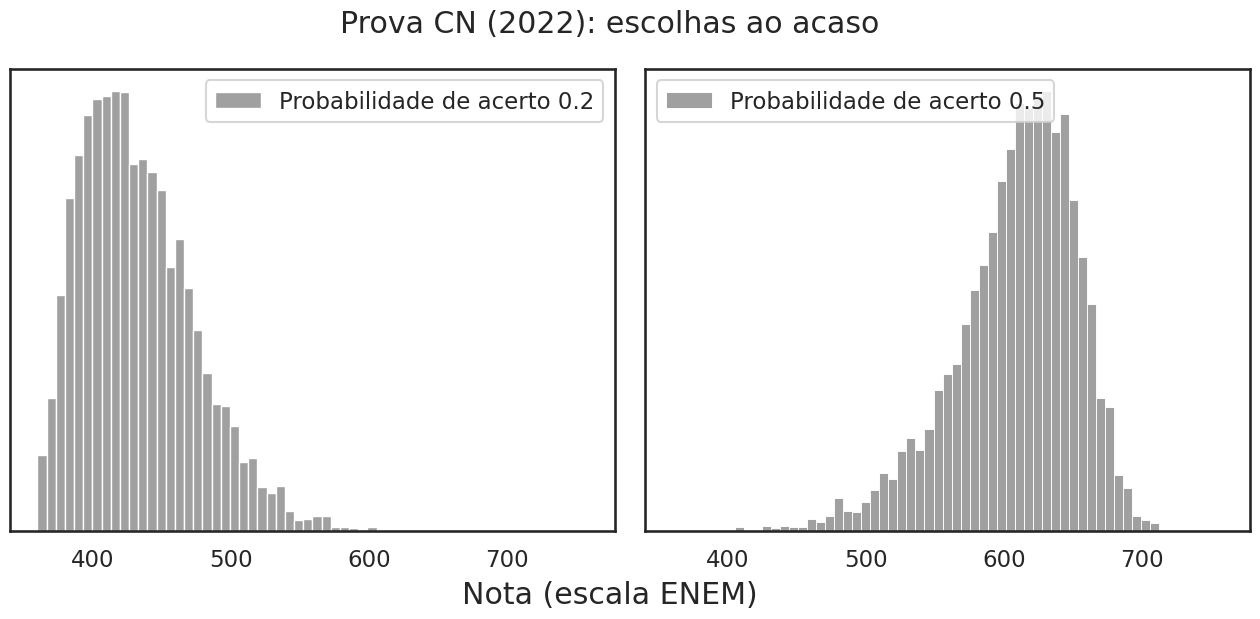

In [475]:
def padr_random(prova,p=0.2,N=1):
    itens = item_info_inep(prova=prova).query("IN_ITEM_ABAN == 0")['CO_ITEM']
    cols = itens.astype(int).sort_values().values
    padr = np.random.default_rng().random(size=(N,len(itens))) < p
    #padr = np.random.randint(0,2,size=(N,len(itens)))
    df = pd.DataFrame(padr,columns = cols)
    return df.astype(int)
    
color = 'gray'
sns.set_style(style='white')
sns.set_context('talk',font_scale=1)
fig,axs = plt.subplots(1,2,sharex=True,figsize = (16,6))
plt.subplots_adjust(wspace=0.05)
ax1 = axs[0]; ax2 = axs[1]
padr = padr_random(prova,.2,5000)
scores = score_inep(padr,ano,area,enemscale=True)
sns.histplot(scores,x='nota',ax=ax1,label='Probabilidade de acerto 0.2',color=color)
ax1.set_ylabel("")
ax1.set_xlabel('')
ax1.set_yticks([])
ax1.legend()
padr = padr_random(prova,.5,5000)
scores = score_inep(padr,ano,area,enemscale=True)
sns.histplot(scores,x='nota',ax=ax2,label='Probabilidade de acerto 0.5',color=color)
ax2.set_ylabel("")
ax2.set_xlabel('')
ax2.set_yticks([])
ax2.legend()
fig.supxlabel("Nota (escala ENEM)",y=-0.02);
fig.suptitle(f"Prova {area} ({ano}): escolhas ao acaso")

array([[<Axes: title={'center': 'nota'}>]], dtype=object)

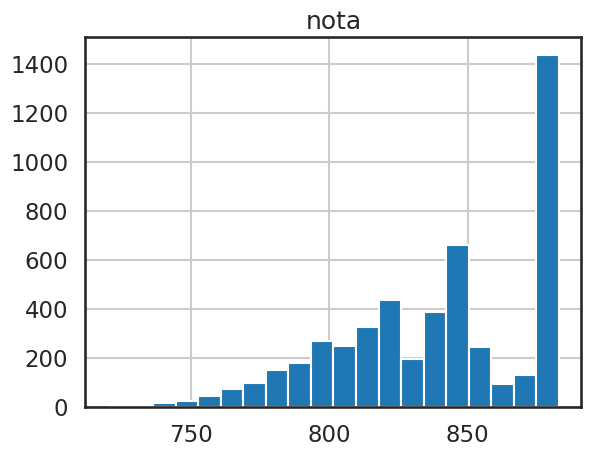

In [482]:
padr = padr_random(prova,.97,5000)
scores = score_inep(padr,ano,area,enemscale=True)
scores.hist('nota',bins=20)

In [476]:
score_inep(padr,ano,area,enemscale=True)

,nota,se
0,592.453569,30.094809
1,687.157799,19.797696
2,557.758120,50.950463
3,585.801017,36.925272
4,654.055205,24.915033
...,...,...
4995,482.628622,67.948847
4996,587.561868,44.019705
4997,523.702395,55.210568
4998,623.062519,25.240094


In [382]:
from scipy import stats

<Axes: ylabel='Count'>

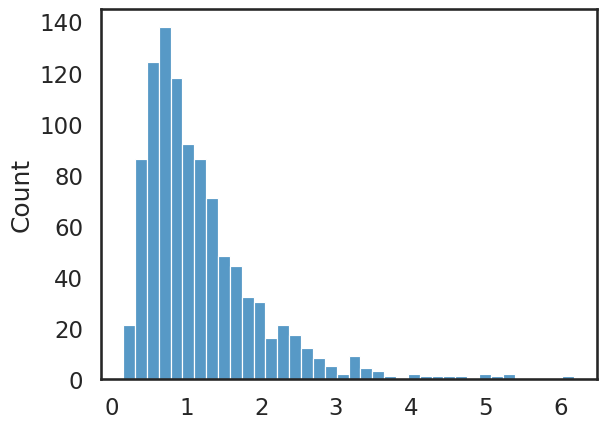

In [439]:
sns.histplot(stats.lognorm.rvs(s=.6,loc=0,size=1000))

In [451]:
stats.lognorm.rvs(s=.6,loc=0,size=len(params_novo))

array([1.22869337, 0.41874395, 0.87639243, 1.09253098, 0.75774835,
       2.1658712 , 1.57509221, 1.93197559, 1.63930566, 2.01437699,
       0.63999943, 0.41590443, 2.2135929 , 2.74196616, 0.51835455,
       2.13227112, 1.16119214, 1.1202399 , 0.66295116, 1.5420567 ,
       0.51649521, 0.74089759, 1.12269682, 1.24032979, 1.0159136 ,
       0.49556776, 1.5480107 , 0.32833333, 0.80840915, 1.92601063,
       0.96912783, 0.56878136, 1.66621327, 3.27727215, 0.38199862,
       0.81946595, 4.21448191, 0.48532515, 3.41573764, 1.17497064,
       0.59465515])

In [453]:
params_novo['a_inep'].values

array([1.71131, 2.07884, 1.98964, 1.95358, 0.69982, 3.29206, 1.82114,
       2.13571, 2.00512, 1.52512, 1.75013, 1.73494, 1.2012 , 4.44898,
       2.39896, 1.51222, 2.35097, 3.07166, 5.31621, 1.48588, 1.87507,
       2.54149, 2.33494, 3.55169, 2.02681, 0.8924 , 0.60239, 1.78429,
       5.67249, 2.46518, 1.90673, 2.14355, 1.68577, 2.41581, 1.99451,
       3.25053, 3.48192, 0.40583, 3.82953, 2.86161, 0.98394])

array([<Axes: title={'center': 'nota'}>, <Axes: title={'center': 'se'}>],
      dtype=object)

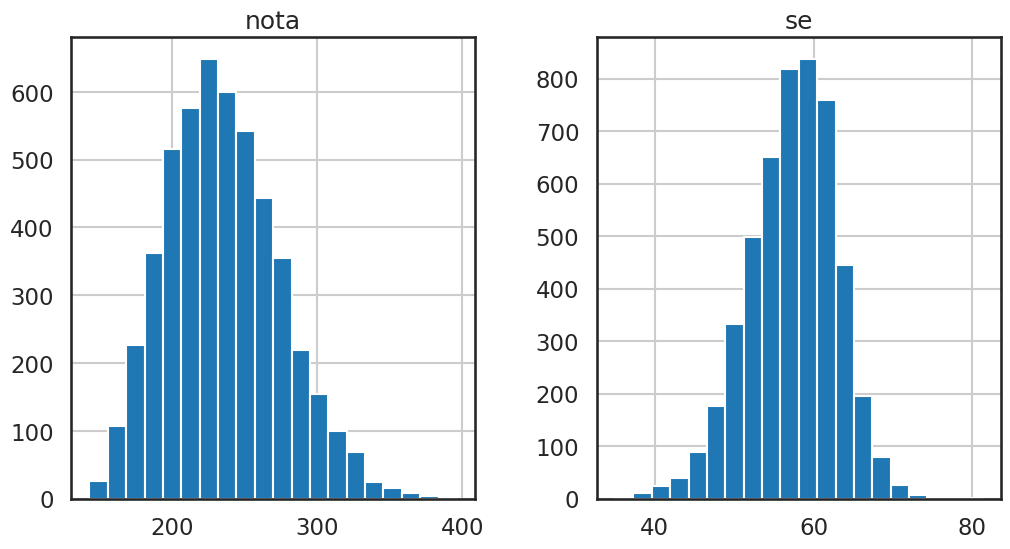

In [462]:
fig,ax = plt.subplots(1,2,figsize=(12,6))
padr = padr_random(prova,.2,5000)
params_novo = params_inep(ano,area,dropna=True)
params_novo['b_inep'] = stats.norm.rvs(0,1,len(params_novo))
params_novo['a_inep'] = stats.lognorm.rvs(s=.6,loc=0,size=len(params_novo))

scores = score_inep(padr,ano,area,params=params_novo,enemscale=True,method='EAP')
scores.dropna().hist(bins=20,ax=ax)

In [446]:
scores.dropna()

,nota,se
1,42.022407,285.419170
2,244.059033,66.754079
3,168.197073,136.701618
4,65.901093,246.656164
5,118.246769,204.250383
...,...,...
4995,-75.041278,551.792176
4996,256.786294,85.594097
4997,183.687286,171.492370
4998,-1761.042209,3087.973752


In [416]:
params_novo

,a_inep,b_inep,c_inep,u
CO_ITEM,,,,
31313,1.71131,3.830510,0.16150,1
111694,2.07884,3.102318,0.17191,1
111668,1.98964,2.036871,0.19415,1
18228,1.95358,0.701259,0.11246,1
141574,0.69982,1.534363,0.03441,1
111558,3.29206,1.305888,0.14008,1
141725,1.82114,3.548703,0.06674,1
141597,2.13571,3.313233,0.14865,1
81969,2.00512,2.945071,0.16882,1
